In [1]:
## In this cell we import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Harmonic oscillator

Hamiltonian function
\begin{eqnarray}
    \mathcal{H}(x, p) & = &
    E_k + V(x) \cr
    &=&
    \frac{p^2}{2m} + V(x) \, .
\end{eqnarray}
    

Equations of motion
\begin{eqnarray}
\begin{cases}
\dot{x} &= \frac{\partial \mathcal{H}}{\partial p} = \frac{p(t)}{m} \\
\dot{p} &= - \frac{\partial \mathcal{H}}{\partial x} =  F(t)  = -\frac{d}{dx} V(x(t)) \\
\end{cases} \, .
\end{eqnarray}
    
Potential energy function:
\begin{eqnarray}
    V(x) = \frac{1}{2}k x^2 \, ,
\end{eqnarray}
where $k$ is the spring constant (units: $\mathrm{N\,m^{-1}} = \mathrm{kg\,s^{-2}}$).

In [2]:
## This cell is used to define the problem
## The comment on the right side of each variable denotes the physical units

# Spring constant
k_spring = 1.5   #  N m-1  

# Mass
m        = 0.4   #  kg

# Angular frequency
omega    = np.sqrt(k_spring / m)   # s-1

# Initial position
x0       = 1   # m

# Initial momentum
p0       = 0   # kg m s-1


# Initial and arrival time
tmin     = 0    # s    
tmax     = 10   # s   




# Integrator timestep
dt       = 0.1   # s

# Array with time values
t        = np.arange(tmin, tmax + dt, dt)   # s

# Number of timestpes
Nt       = len(t)

# Number of timestpes
# Nt       = 10
# Array with time values
# t        = np.linspace(tmin, tmax, Nt)   # s

# Integrator timestep
# dt       = t[1] - t[0]   # s

## Exact solution

The second equation of the motion of the harmonic oscillator can be written as
\begin{equation}
m\ddot{x}  + k x = 0.
\end{equation}

The exact solution is 

\begin{eqnarray}
x(t) = x(0) \cos(\omega t) + \frac{p(0)}{m \omega} \sin (\omega t) \, ,
\end{eqnarray}

where we introduced the angular frequency of the oscillation (units: $\mathrm{s^{-1}}$)

\begin{eqnarray}
\omega = \sqrt{\frac{k}{m}} \, .
\end{eqnarray}

The exact solution for the momentum is

\begin{eqnarray}
p(t) = - m \omega x(0) \sin( \omega t ) + p(0) \cos( \omega t ) \, .
\end{eqnarray}


In [3]:
## In this cell we write the exact solution

# Position solution
x        =  x0 * np.cos( omega * t ) + p0 / m / omega * np.sin( omega * t )

# Momentum solution
p        = - m * omega * x0 * np.sin( omega * t ) + p0 * np.cos( omega * t )

## Euler integrator

The semi-implicit Euler integrator is written as

\begin{equation}
\begin{cases}
F(t_k) = - \frac{d}{dx} V(x(t_k)) \cr
x(t_{k+1}) =  x(t_k) + \frac{p(t_k)}{m}\Delta t + \frac{F(t_k)}{m} \Delta t^2 \cr
p(t_{k+1}) =  p(t_k) + F(t_k)\Delta t 
\end{cases} \, ,
\end{equation}

where $\Delta$ is the timestep.

In [4]:
## In this cell we implement the Euler integrator

# First, we create two vectors of zeros for the position and the momentum with the number of timesteps Nt
x_euler    = np.zeros(Nt)
p_euler    = np.zeros(Nt)

# We replace the first entry of the two vectors with the initial and the 
x_euler[0] = x0
p_euler[0] = p0

for k in range(Nt-1):
    F       =  - k_spring * x_euler[k]
    
    x_euler[k+1]  =  x_euler[k]  +  p_euler[k] * dt / m + F / m * dt ** 2 
    p_euler[k+1]  =  p_euler[k]  +  F * dt 

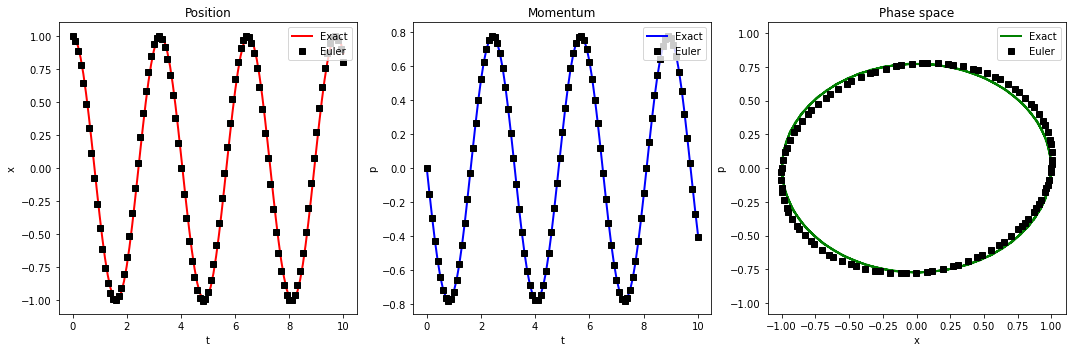

In [5]:
# These two commands are used to define the font size
font = {'size'   : 12}
plt.rc('font', **font)


# This command is used to create three graphs in a row in the same figure
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15,5)) 


# The option "label = " is used to create a legend 
# Plot the position
ax1.plot( t, x,       'r',   linewidth = 2,  label = "Exact")
ax1.plot( t, x_euler, 'ks',  linewidth = 2,  label = "Euler")

ax1.set_title('Position')
ax1.set_xlabel('t')
ax1.set_ylabel('x')

#This command create a legend 
ax1.legend(loc="upper right")

# Plot the momentum
ax2.plot( t, p,       'b',   linewidth = 2,  label = "Exact")
ax2.plot( t, p_euler, 'ks',  linewidth = 2,  label = "Euler")

ax2.set_title('Momentum')
ax2.set_xlabel('t')
ax2.set_ylabel('p')
ax2.legend(loc="upper right")

# Plot the solution in the phase space
ax3.plot( x,       p,       'g',  linewidth = 2,  label = "Exact")
ax3.plot( x_euler, p_euler, 'ks', linewidth = 2,  label = "Euler")

ax3.set_title('Phase space')
ax3.set_xlabel('x')
ax3.set_ylabel('p')
ax3.axis("equal")
ax3.legend(loc="upper right")


# This command is used to fix the margins
fig.tight_layout()

## Velocity Verlet integrator

The velocity Verlet scheme is written as

\begin{equation}
\begin{cases}
F(t) &=& - \nabla_r V(r(t)) \cr
r(t+\Delta t) &=&  r(t) + \frac{p(t)}{M}\Delta t + \frac{1}{2} \frac{F(t)}{M} \Delta t^2 \cr
F(t+\Delta t) &=& - \nabla_r V(r(t+\Delta t)) \cr
p(t+\Delta t) &=&  p(t) + F(t)\Delta t
\end{cases} \, .
\end{equation}

where $\Delta t$ is the integrator timestep.

In [10]:
## In this cell we implement the Velocity Verlet integrator

# First, we create two vectors of zeros for the position and the momentum with the number of timesteps Nt
x_vverlet    = np.zeros(Nt)
p_vverlet    = np.zeros(Nt)


# We replace the first entry of the two vectors with the initial and the 
x_vverlet[0] = x0
p_vverlet[0] = p0

# We replace the first entry of the two vectors with the initial and the 
x_vverlet[0] = x0

for k in range(Nt-1):
    F       =  - k_spring * x_vverlet[k]
    x_vverlet[k+1]  =  x_vverlet[k]  +  p_vverlet[k] * dt / m + 0.5 * F / m * dt ** 2
    
    F1      =  - k_spring * x_vverlet[k+1]
    p_vverlet[k+1]  =  p_vverlet[k]  +  0.5 * ( F + F1 ) * dt 

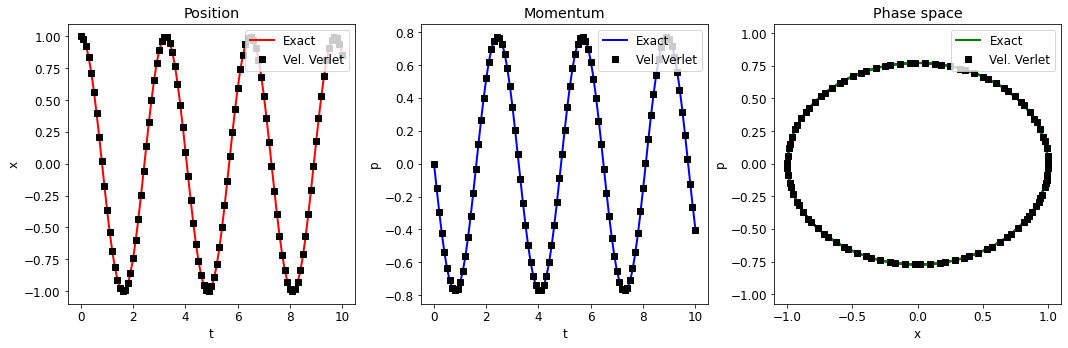

In [11]:
# These two commands are used to define the font size
font = {'size'   : 12}
plt.rc('font', **font)


# This command is used to create three graphs in a row in the same figure
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15,5)) 


# The option "label = " is used to create a legend 
# Plot the position
ax1.plot( t, x,         'r',   linewidth = 2,  label = "Exact")
ax1.plot( t, x_vverlet, 'ks',  linewidth = 2,  label = "Vel. Verlet")

ax1.set_title('Position')
ax1.set_xlabel('t')
ax1.set_ylabel('x')

#This command create a legend 
ax1.legend(loc="upper right")

# Plot the momentum
ax2.plot( t, p,         'b',   linewidth = 2,  label = "Exact")
ax2.plot( t, p_vverlet, 'ks',  linewidth = 2,  label = "Vel. Verlet")

ax2.set_title('Momentum')
ax2.set_xlabel('t')
ax2.set_ylabel('p')
ax2.legend(loc="upper right")

# Plot the solution in the phase space
ax3.plot( x,         p,         'g',  linewidth = 2,  label = "Exact")
ax3.plot( x_vverlet, p_vverlet, 'ks', linewidth = 2,  label = "Vel. Verlet")

ax3.set_title('Phase space')
ax3.set_xlabel('x')
ax3.set_ylabel('p')
ax3.axis("equal")
ax3.legend(loc="upper right")


# This command is used to fix the margins
fig.tight_layout()